# SIGNAL PROCESSING WITH DATA VISUALIZATION

In [1]:
import matplotlib.pyplot as plt

### modules containing all the functions for signal processing by Mia
from DATAProcessing import LoadData, DataLookUp, ButterBandpassFilter, Resampling, Transformer, FindPeakPropteries

## 1. VISUALIZING DATA WITH SOME PROCESSING  

### An example with no data transformation, no resampling, no bandpass filtering.

Total length of signal 9000 which is 0.5 minutes


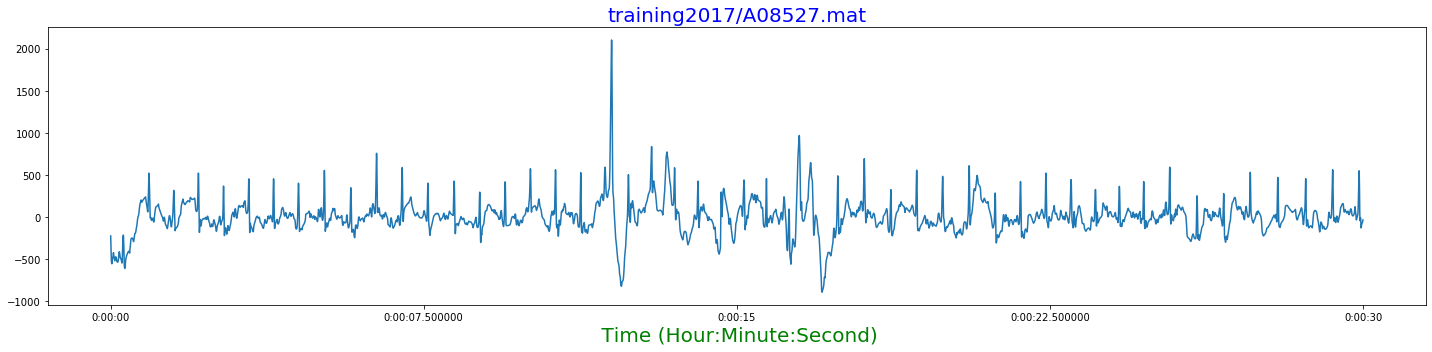

In [2]:
DataLookUp(path_to_file = 'training2017/A08527.mat', 
           start=0, stop=9000,                     # load part of ECGs to look at, especially helpful for full-night ECGs 
           loadall=True,                           # load all ECGs full length if this is True
           in_fs=[300, None], out_fs=[300, None],  # apply resampling. Use list for [ecg, label] in case of sampling with different frequence
           transform = None,                 # apply transform
           cutoff=None, order=5,                   # Apply filter
           plot=True, summary=True)

### An example to resampling frequency from 300 to 150 Hz. (param: in_fs, out_fs), and transformed ECGs (param: transform)

Total length of signal 9000 which is 0.5 minutes


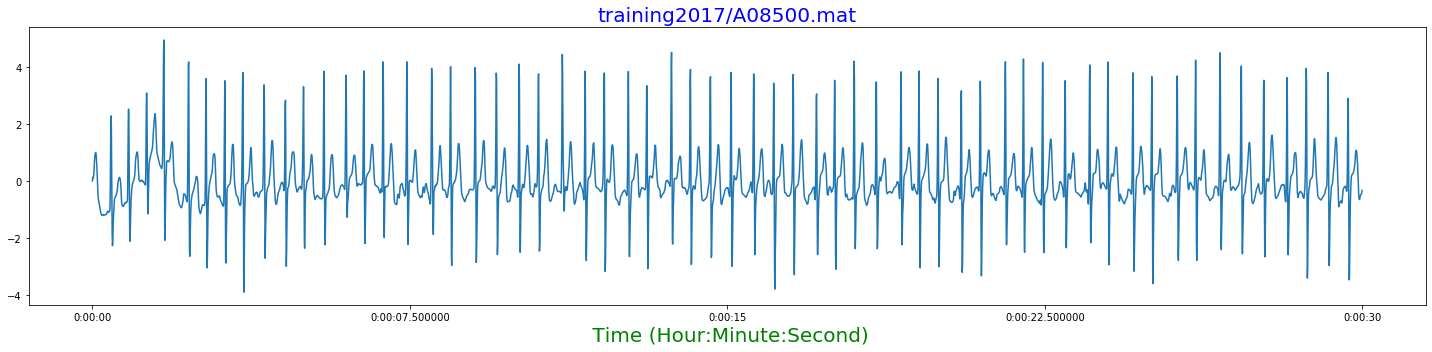

In [3]:
DataLookUp(path_to_file = 'training2017/A08500.mat', 
           start=0, stop=9000,                     # load part of ECGs to look at, especially helpful for full-night ECGs 
           loadall=True,                           # load all ECGs full length if this is True
           
           in_fs=[300, None], out_fs=[150, None],  # apply resampling. Use list for [ecg, label] in case of sampling with different frequence
           
           transform = 'standard',                 # apply transform
           cutoff=None, order=5,                   # Apply filter
           plot=True, summary=True)

# LET'S USE THE "WORSEN" ECG 'A08527' AS AN EXAMPLE

## 2. DETECT HEART RATE

In [137]:
Original = LoadData(dataPath = 'training2017/',sampleName = 'A08527')

ECGs from file A08527, length of 9000


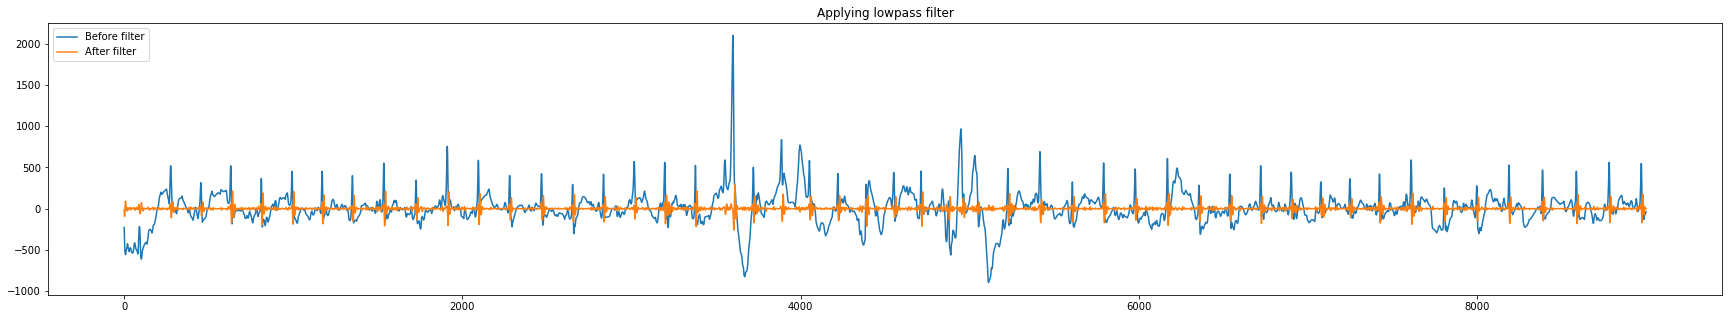

In [138]:
AfterFiltering = ButterBandpassFilter(Original, lowcut = 20, highcut = 50, fs=300, order=2, axis=0, plot=True)

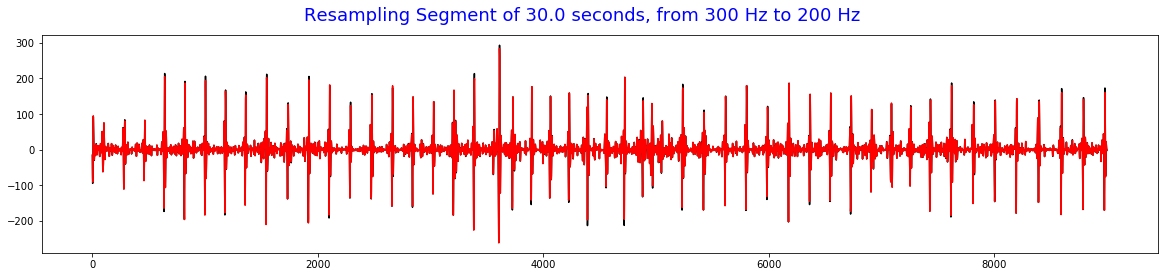

In [139]:
AfterRESampling = Resampling(AfterFiltering, in_fs = 300, out_fs = 200, mode='downfft', axis=0, plot=True)
#### NOTE THAT THE RED COLOR IS THE RESAMPLED ECG, WHICH OVERSHADOWED THE BLACK COLOR (THE ORIGINAL ECG SIGNAL) 

### Before resampling

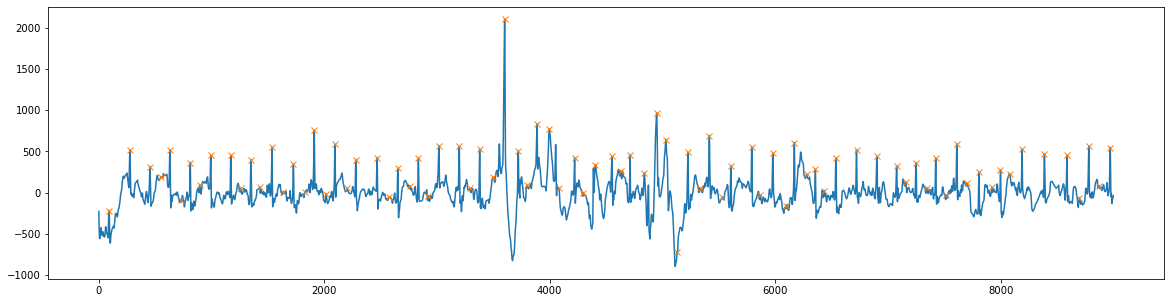

(84, 461.7738095238095)

In [140]:
FindPeakPropteries(x = Original, dist = 75, plot = True)

### After filtering

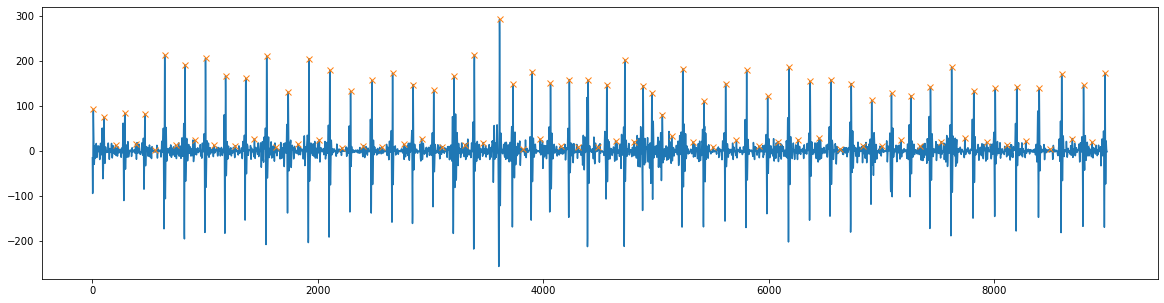

(99, 175.6669116812227)

In [141]:
FindPeakPropteries(x = AfterFiltering, dist = 75, plot = True)

### After resampling

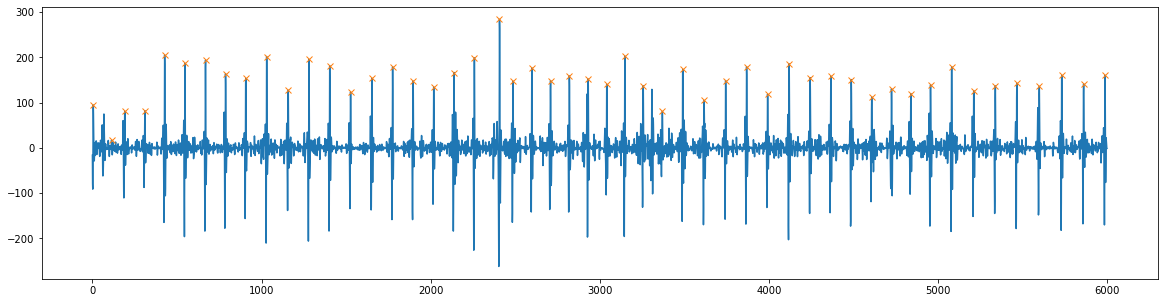

(51, 301.5187052995589)

In [142]:
FindPeakPropteries(x = AfterRESampling, dist = 75, plot = True)

## 2. DETECT RESPIRATORY RATE

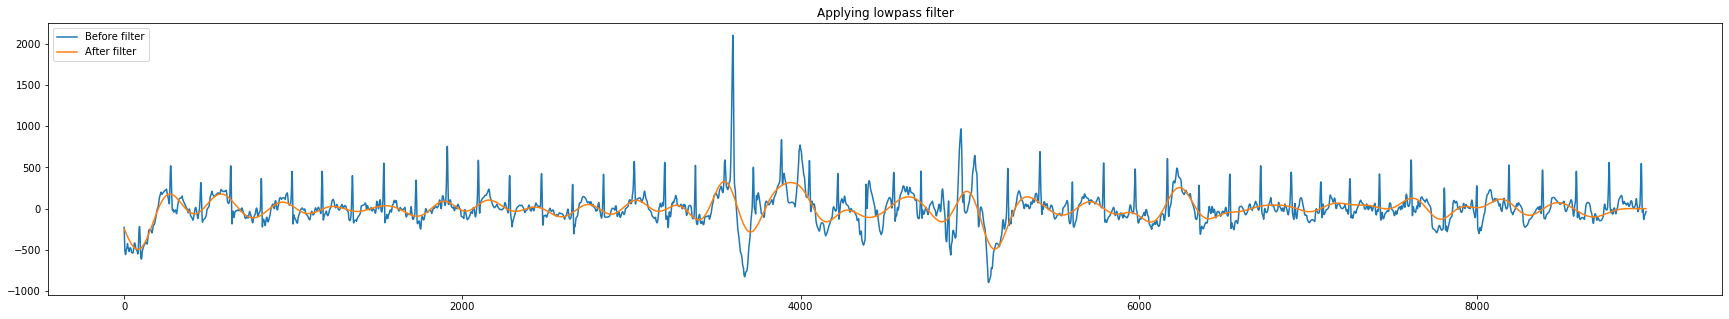

array([-2.45389306e+02, -2.50212043e+02, -2.55029330e+02, ...,
        5.05979101e-03,  4.32832181e-03,  3.68325177e-03])

In [145]:
ButterBandpassFilter(Original, lowcut = 0.05, highcut = 1.2, fs=300, order=5, mode='sos', axis=0, plot=True)